In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Data- acquisition scorecard.xlsx')

In [3]:
dict_ = {'ENQ_1':'days_last_enq','ENQ_2':'days_hl_last_enq','ENQ_3':'#_enq_3mnths','ENQ_4':'#_hle_enq_3mnths','ENQ_5':'#_enq_12mnths','ENQ_6':'#_hle_enq_12mnths','ENQ_7':'Tot_enq','ENQ_8':'Tot_hle_enq','ACCOUNT_9':'#_defaults_3mnths','ACCOUNT_10':'#_defaults_12mnths','ACCOUNT_11':'days_last_acc_open','ACCOUNT_12':'Tot_accounts','ACCOUNT_13':'Tot_hle_accounts','ACCOUNT_14':'Tot_unsecured_loans','ACCOUNT_15':'Tot_live_loans','ACCOUNT_16':'Tot_live_homeloans','ACCOUNT_17':'Tot_live_unsecuredloans','ACCOUNT_18':'Tot_amt_outstanding','ACCOUNT_19':'Tot_secured_outstanding_amt','ACCOUNT_20':'Tot_unsecured_outstanding_amt','ACCOUNT_21':'Avg_days_in_debt'}

In [4]:
df.rename(columns={'ENQ_1':'days_last_enq','ENQ_2':'days_hl_last_enq','ENQ_3':'#_enq_3mnths','ENQ_4':'#_hle_enq_3mnths','ENQ_5':'#_enq_12mnths','ENQ_6':'#_hle_enq_12mnths','ENQ_7':'Tot_enq','ENQ_8':'Tot_hle_enq','ACCOUNT_9':'#_defaults_3mnths','ACCOUNT_10':'#_defaults_12mnths','ACCOUNT_11':'days_last_acc_open','ACCOUNT_12':'Tot_accounts','ACCOUNT_13':'Tot_hle_accounts','ACCOUNT_14':'Tot_unsecured_loans','ACCOUNT_15':'Tot_live_loans','ACCOUNT_16':'Tot_live_homeloans','ACCOUNT_17':'Tot_live_unsecuredloans','ACCOUNT_18':'Tot_amt_outstanding','ACCOUNT_19':'Tot_secured_outstanding_amt','ACCOUNT_20':'Tot_unsecured_outstanding_amt','ACCOUNT_21':'Avg_days_in_debt'},inplace=True)

In [5]:
df.head()

,ID,Age,Customer_type,Gross_income,Net_income,SEX,Type_of_industry,Marital_Status,Months_in_city,Months_in_current_job,Org_Type,Bank_balance,Debt_ratio,Target,days_last_enq,days_hl_last_enq,#_enq_3mnths,#_hle_enq_3mnths,#_enq_12mnths,#_hle_enq_12mnths,Tot_enq,Tot_hle_enq,#_defaults_3mnths,#_defaults_12mnths,days_last_acc_open,Tot_accounts,Tot_hle_accounts,Tot_unsecured_loans,Tot_live_loans,Tot_live_homeloans,Tot_live_unsecuredloans,Tot_amt_outstanding,Tot_secured_outstanding_amt,Tot_unsecured_outstanding_amt,Avg_days_in_debt
0,1794,40.000,SALARIED,70891.000,62491.000,MALE,OTHERS,MARRIED,229.000,108,INDIVIDUAL,37806.000,0.190,0,324,0,0,0,1,0,14,0,0,0,1486,9,0,8,2,0,2,275606,0,275606,5311
1,3183,35.000,SALARIED,53617.000,53617.000,MALE,OTHERS,MARRIED,408.000,60,INDIVIDUAL,15499.000,0.420,0,616,1978,0,0,0,0,11,1,5,5,1912,8,0,6,1,0,0,4844,4824,20,5289
2,1841,46.000,SALARIED,20000.000,45912.000,MALE,OTHERS,MARRIED,552.000,204,INDIVIDUAL,15034.000,0.340,0,688,0,0,0,0,0,3,0,0,0,681,4,2,1,1,1,0,15695,15695,0,5153
3,1115,49.000,SALARIED,40000.000,77440.000,FEMALE,OTHERS,MARRIED,0.000,0,INDIVIDUAL,27349.000,0.080,0,52,52,2,2,3,2,3,2,0,0,5143,1,1,0,1,1,0,480051,480051,0,5143
4,3125,45.000,SELF EMPLOYED,36526.000,36526.000,MALE,OTHERS,MARRIED,540.000,22,INDIVIDUAL,28520.000,0.480,0,33,0,1,0,1,0,2,0,5,5,3310,2,0,0,1,0,0,2781,2781,0,5093


In [28]:
df.describe().to_csv('Data_descibe.csv')

In [6]:
print((df['#_enq_3mnths'] < df['#_hle_enq_3mnths']).sum())
print((df['#_enq_12mnths'] < df['#_hle_enq_12mnths']).sum())
print((df['#_enq_3mnths'] == df['#_hle_enq_3mnths']).sum())
print((df['#_enq_12mnths'] == df['#_hle_enq_12mnths']).sum())

0
0
2575
1473


In [7]:
pd.DataFrame(df.groupby('Customer_type')[['#_defaults_3mnths']].value_counts(normalize=True)).rename(columns={0:'Proportion of defaults'})

Proportion of defaults
Customer_type #_defaults_3mnths                        
NON EARNING   0                                   0.826
              1                                   0.087
              2                                   0.043
              6                                   0.043
SALARIED      0                                   0.882
              1                                   0.052
              6                                   0.018
              2                                   0.018
              3                                   0.016
              5                                   0.008
              4                                   0.004
              7                                   0.003
SELF EMPLOYED 0                                   0.836
              1                                   0.075
              2                                   0.031
              6                                   0.024
              3                                   0.017
              5                                   0.008
              4                                   0.005
              7                                   0.004

In [8]:
df.loc[df['#_defaults_3mnths'] == 7]

,ID,Age,Customer_type,Gross_income,Net_income,SEX,Type_of_industry,Marital_Status,Months_in_city,Months_in_current_job,Org_Type,Bank_balance,Debt_ratio,Target,days_last_enq,days_hl_last_enq,#_enq_3mnths,#_hle_enq_3mnths,#_enq_12mnths,#_hle_enq_12mnths,Tot_enq,Tot_hle_enq,#_defaults_3mnths,#_defaults_12mnths,days_last_acc_open,Tot_accounts,Tot_hle_accounts,Tot_unsecured_loans,Tot_live_loans,Tot_live_homeloans,Tot_live_unsecuredloans,Tot_amt_outstanding,Tot_secured_outstanding_amt,Tot_unsecured_outstanding_amt,Avg_days_in_debt
27,2123,29.000,SELF EMPLOYED,475755.920,475755.917,MALE,AUTOMOTIVE,SINGLE,144.000,67,PROPRIETORSHIP,NaN,0.250,1,23,31,6,1,12,2,46,3,7,7,808,23,1,3,1,0,1,172798,0,172798,4022
58,3179,46.000,SELF EMPLOYED,52687.330,52687.333,MALE,OTHERS,MARRIED,540.000,27,INDIVIDUAL,14478.000,1.090,0,10,10,2,1,4,2,5,2,7,7,1686,4,0,4,1,0,1,413218,0,413218,3272
63,2836,52.000,SALARIED,70000.000,62173.000,MALE,GOVERNMENT,MARRIED,360.000,264,INDIVIDUAL,31146.000,0.450,0,2,2,2,2,2,2,8,2,7,7,347,16,0,15,6,0,6,185820,0,185820,3206
216,3721,32.000,SELF EMPLOYED,24625.000,24625.000,MALE,OTHERS,MARRIED,372.000,60,INDIVIDUAL,17303.000,0.210,0,193,512,0,0,1,0,17,1,7,7,191,18,1,11,7,1,4,1128521,627104,501417,1892
217,3799,32.000,SELF EMPLOYED,24625.000,24625.000,MALE,OTHERS,MARRIED,372.000,60,INDIVIDUAL,17303.000,0.210,0,193,512,0,0,1,0,17,1,7,7,191,18,1,11,7,1,4,1128521,627104,501417,1892
375,2186,45.000,SALARIED,23211.000,24944.667,FEMALE,IT AND COMMUNICATION,MARRIED,36.000,36,INDIVIDUAL,NaN,0.350,0,2,2,1,1,4,1,6,1,7,7,815,2,0,2,2,0,2,68044,0,68044,1417
451,1244,36.000,SELF EMPLOYED,1375.000,1375.000,MALE,OTHERS,MARRIED,120.000,40,PROPRIETORSHIP,141855.000,23.280,0,1,72,6,1,20,10,57,25,7,7,122,31,5,14,9,2,4,42756258,34805240,7951018,1278
567,1390,47.000,SALARIED,9296.000,40266.000,MALE,OTHERS,MARRIED,420.000,0,GOVT (ONLY FOR SALARIED),9431.000,0.120,0,112,3036,0,0,3,0,5,1,7,7,111,5,2,2,3,1,2,386307,335237,51070,1115
603,756,48.000,SALARIED,400000.000,20928.000,MALE,OTHERS,MARRIED,0.000,228,INDIVIDUAL,10547.000,0.350,0,20,852,4,0,6,0,16,4,7,7,832,8,1,7,2,1,1,640657,560253,80404,1075
695,2383,52.000,SELF EMPLOYED,37500.000,37500.000,MALE,OTHERS,MARRIED,624.000,88,INDIVIDUAL,108762.000,1.770,1,112,278,0,0,3,1,8,1,7,7,101,4,0,1,2,0,1,67652,39434,28218,990


In [9]:
df.groupby(['Customer_type'])[['Gross_income','Net_income','Bank_balance','Debt_ratio']].mean()

,Gross_income,Net_income,Bank_balance,Debt_ratio
Customer_type,,,,
NON EARNING,25235.130,30519.710,11147.000,0.694
SALARIED,60032.508,42543.268,47105.383,452.231
SELF EMPLOYED,108471.388,108076.720,214506.598,14995.726


In [10]:
income_diff = df.loc[df[(df['Gross_income'] < df['Net_income'])].index,['ID','Customer_type','Gross_income','Net_income']]

In [11]:
income_diff.head()

,ID,Customer_type,Gross_income,Net_income
2,1841,SALARIED,20000.000,45912.000
3,1115,SALARIED,40000.000,77440.000
6,3602,SELF EMPLOYED,74455.580,74455.583
14,1277,SALARIED,31631.000,41200.000
15,2181,SELF EMPLOYED,66083.330,66083.333


In [12]:
income_diff.loc[income_diff['Customer_type'] == 'NON EARNING',:]

,ID,Customer_type,Gross_income,Net_income
333,1928,NON EARNING,30000.000,30700.000
409,2041,NON EARNING,63710.000,69973.330
1171,2745,NON EARNING,11173.000,14252.000
2310,2157,NON EARNING,20000.000,40000.000
2470,2031,NON EARNING,17000.000,18000.000
2493,1010,NON EARNING,1.000,91234.000
3023,2040,NON EARNING,26433.330,26433.333
3053,2081,NON EARNING,37566.000,50359.000


In [13]:
income_diff.groupby('Customer_type').size()

Customer_type
NON EARNING        8
SALARIED         798
SELF EMPLOYED    783
dtype: int64

In [14]:
df['Customer_type'].value_counts()

SELF EMPLOYED    2256
SALARIED         1701
NON EARNING        23
Name: Customer_type, dtype: int64

In [15]:
df['SEX'].value_counts()

MALE      3342
FEMALE     634
Name: SEX, dtype: int64

In [16]:
pd.DataFrame(df['Type_of_industry'].value_counts())

,Type_of_industry
OTHERS,3272
TEXTILES,67
CONSTRUCTION,53
FOOD PRODUCTS,41
IT AND COMMUNICATION,38
TRANSPORT LOGISTICS,35
EDUCATION,31
HEALTHCARE AND HEALTHCARE PROVIDERS,29
INSTITUTIONS AND TRUST,28
ENGINEERING,25


In [17]:
df['Marital_Status'].value_counts()

MARRIED      3542
SINGLE        414
WIDOWED        12
DIVORCED        6
SEPARATED       2
Name: Marital_Status, dtype: int64

```python
for i in df.describe().columns.tolist()[1:]:
    sns.histplot(df[i])
    plt.axvline(df[i].mean(),color='r',linestyle='--')
    plt.axvline(df[i].median(),color='b',linestyle='-')
    plt.legend({'Mean':df[i].mean(),'Median':df[i].median()},loc='upper right')
    plt.show()
```

In [18]:
df.head(2)

,ID,Age,Customer_type,Gross_income,Net_income,SEX,Type_of_industry,Marital_Status,Months_in_city,Months_in_current_job,Org_Type,Bank_balance,Debt_ratio,Target,days_last_enq,days_hl_last_enq,#_enq_3mnths,#_hle_enq_3mnths,#_enq_12mnths,#_hle_enq_12mnths,Tot_enq,Tot_hle_enq,#_defaults_3mnths,#_defaults_12mnths,days_last_acc_open,Tot_accounts,Tot_hle_accounts,Tot_unsecured_loans,Tot_live_loans,Tot_live_homeloans,Tot_live_unsecuredloans,Tot_amt_outstanding,Tot_secured_outstanding_amt,Tot_unsecured_outstanding_amt,Avg_days_in_debt
0,1794,40.000,SALARIED,70891.000,62491.000,MALE,OTHERS,MARRIED,229.000,108,INDIVIDUAL,37806.000,0.190,0,324,0,0,0,1,0,14,0,0,0,1486,9,0,8,2,0,2,275606,0,275606,5311
1,3183,35.000,SALARIED,53617.000,53617.000,MALE,OTHERS,MARRIED,408.000,60,INDIVIDUAL,15499.000,0.420,0,616,1978,0,0,0,0,11,1,5,5,1912,8,0,6,1,0,0,4844,4824,20,5289


In [19]:
viz = df.groupby(['Customer_type','SEX'])[['Avg_days_in_debt']].mean().reset_index()

<AxesSubplot: xlabel='Avg_days_in_debt'>

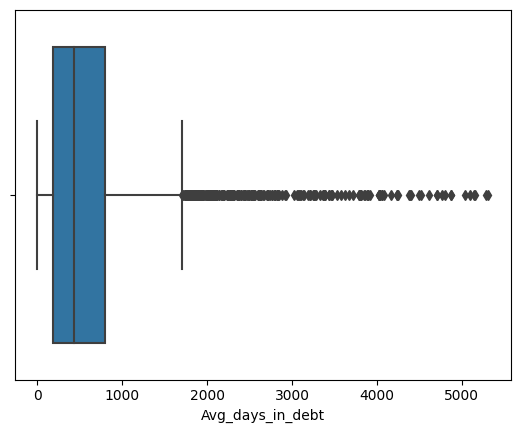

In [20]:
sns.boxplot(data=df,x='Avg_days_in_debt')

<AxesSubplot: xlabel='Customer_type', ylabel='Avg_days_in_debt'>

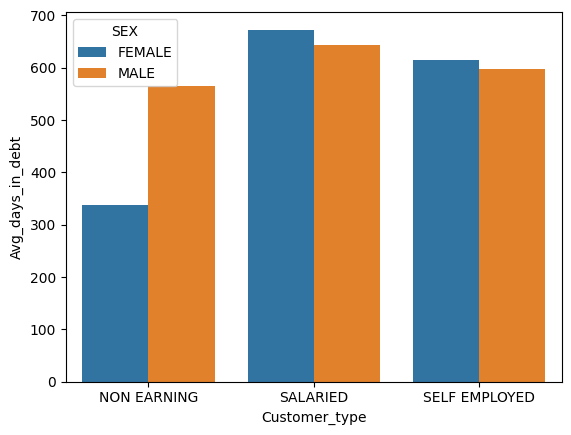

In [49]:
sns.barplot(data=viz,x='Customer_type',y='Avg_days_in_debt',hue='SEX')

In [46]:
df.loc[df['ID'] == 224,:]

,ID,Age,Customer_type,Gross_income,Net_income,SEX,Type_of_industry,Marital_Status,Months_in_city,Months_in_current_job,Org_Type,Bank_balance,Debt_ratio,Target,days_last_enq,days_hl_last_enq,#_enq_3mnths,#_hle_enq_3mnths,#_enq_12mnths,#_hle_enq_12mnths,Tot_enq,Tot_hle_enq,#_defaults_3mnths,#_defaults_12mnths,days_last_acc_open,Tot_accounts,Tot_hle_accounts,Tot_unsecured_loans,Tot_live_loans,Tot_live_homeloans,Tot_live_unsecuredloans,Tot_amt_outstanding,Tot_secured_outstanding_amt,Tot_unsecured_outstanding_amt,Avg_days_in_debt
104,224,50.000,SELF EMPLOYED,0.080,0.083,MALE,OTHERS,MARRIED,0.000,0,INDIVIDUAL,159401.000,1311486.000,0,72,72,1,1,1,1,10,5,0,3,1858,9,2,2,2,2,0,2111273,2111273,0,2604


In [45]:
df.loc[df['Customer_type']=='SELF EMPLOYED',['ID','Debt_ratio','Bank_balance','Tot_live_loans','Tot_amt_outstanding','Avg_days_in_debt']].sort_values(by='Debt_ratio',ascending=False)

,ID,Debt_ratio,Bank_balance,Tot_live_loans,Tot_amt_outstanding,Avg_days_in_debt
104,224,1311486.000,159401.000,2,2111273,2604
3464,153,1190478.130,269285.000,0,0,0
2225,236,1039522.750,NaN,1,6934234,375
1682,167,753489.880,65265.000,1,289223,515
1569,175,728565.750,-183948.000,8,22106710,559
299,119,704455.880,125240.000,3,36944,1608
3973,278,670862.250,176119.000,0,8034746,0
1239,291,655728.880,NaN,3,4006139,686
3966,228,574541.880,27275.000,0,4758464,0
1888,2229,540623.380,7427.000,6,4507210,456


In [35]:
viz

,Customer_type,SEX,Debt_ratio
0,NON EARNING,FEMALE,0.981
1,NON EARNING,MALE,0.381
2,SALARIED,FEMALE,380.343
3,SALARIED,MALE,468.189
4,SELF EMPLOYED,FEMALE,8583.017
5,SELF EMPLOYED,MALE,16061.822


<AxesSubplot: xlabel='Customer_type', ylabel='Debt_ratio'>

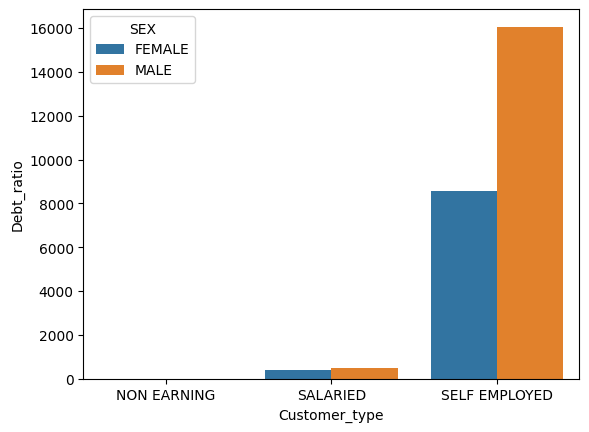

In [34]:
sns.barplot(data=viz,x='Customer_type',y='Debt_ratio',hue='SEX')

<AxesSubplot: xlabel='Customer_type', ylabel='count'>

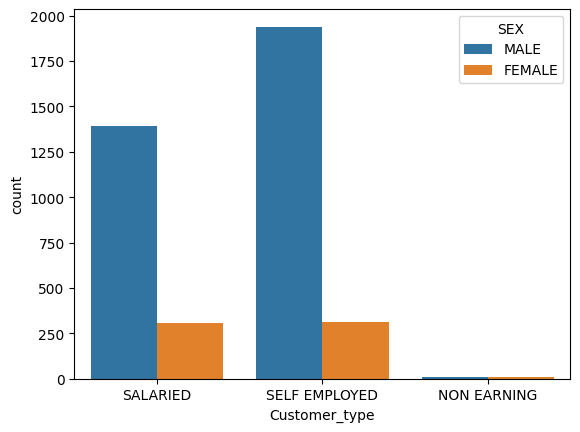

In [26]:
sns.countplot(data=df,x='Customer_type',hue='SEX')

In [16]:
df.head(2)

,ID,Age,Customer_type,Gross_income,Net_income,SEX,Type_of_industry,Marital_Status,Months_in_city,Months_in_current_job,Org_Type,Bank_balance,Debt_ratio,Target,days_last_enq,days_hl_last_enq,#_enq_3mnths,#_hle_enq_3mnths,#_enq_12mnths,#_hle_enq_12mnths,Tot_enq,Tot_hle_enq,#_defaults_3mnths,#_defaults_12mnths,days_last_acc_open,Tot_accounts,Tot_hle_accounts,Tot_unsecured_loans,Tot_live_loans,Tot_live_homeloans,Tot_live_unsecuredloans,Tot_amt_outstanding,Tot_secured_outstanding_amt,Tot_unsecured_outstanding_amt,Avg_days_in_debt
0,1794,40.000,SALARIED,70891.000,62491.000,MALE,OTHERS,MARRIED,229.000,108,INDIVIDUAL,37806.000,0.190,0,324,0,0,0,1,0,14,0,0,0,1486,9,0,8,2,0,2,275606,0,275606,5311
1,3183,35.000,SALARIED,53617.000,53617.000,MALE,OTHERS,MARRIED,408.000,60,INDIVIDUAL,15499.000,0.420,0,616,1978,0,0,0,0,11,1,5,5,1912,8,0,6,1,0,0,4844,4824,20,5289


<AxesSubplot: xlabel='Type_of_industry', ylabel='count'>

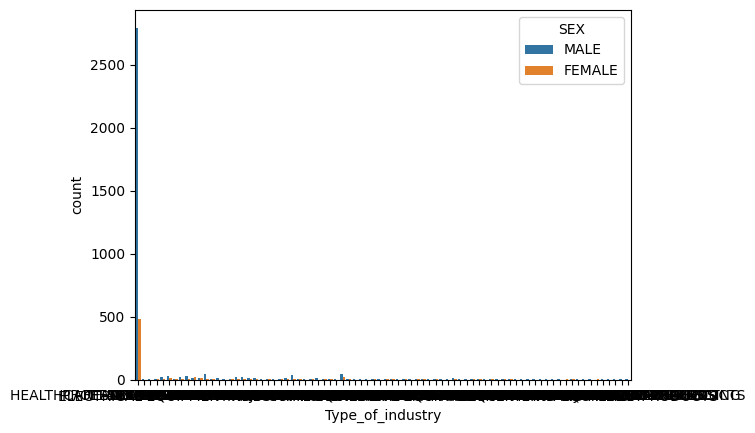

In [27]:
sns.countplot(data=df,x='Type_of_industry',hue='SEX')

## Data preparation

### Duplicated

In [24]:
len(df)

3980

In [26]:
df.ID.nunique()

3894

In [31]:
df.drop(df[df.duplicated()].index,inplace=True)

In [32]:
df.shape

(3894, 35)

### Missing

In [34]:
df.isnull().sum().sort_values(ascending=False)

Bank_balance                     626
Type_of_industry                   5
SEX                                4
Marital_Status                     4
Months_in_city                     4
Age                                1
ID                                 0
Tot_unsecured_loans                0
#_defaults_12mnths                 0
days_last_acc_open                 0
Tot_accounts                       0
Tot_hle_accounts                   0
Tot_live_homeloans                 0
Tot_live_loans                     0
Tot_hle_enq                        0
Tot_live_unsecuredloans            0
Tot_amt_outstanding                0
Tot_secured_outstanding_amt        0
Tot_unsecured_outstanding_amt      0
#_defaults_3mnths                  0
#_hle_enq_3mnths                   0
Tot_enq                            0
#_hle_enq_12mnths                  0
#_enq_12mnths                      0
#_enq_3mnths                       0
days_hl_last_enq                   0
days_last_enq                      0
T

In [52]:
df['bb'] = np.where((df['Customer_type'] == 'SALARIED') & (df['Bank_balance'].isna()),sal_bb,np.where(((df['Customer_type'] == 'SELF EMPLOYED')&(df['Bank_balance'].isna())),se_bb,np.where(((df['Customer_type'] == 'NON EARNING') & (df['Bank_balance'].isna())),ne_bb,df['Bank_balance'])))

In [35]:
df.Bank_balance.describe()

count       3268.000
mean      143444.793
std      1143340.982
min     -2965788.000
25%         9428.250
50%        25327.000
75%        72041.500
max     46674874.000
Name: Bank_balance, dtype: float64

In [36]:
df.Customer_type.unique()

array(['SALARIED', 'SELF EMPLOYED', 'NON EARNING'], dtype=object)

In [40]:
sal_bb = df.loc[df['Customer_type'] == 'SALARIED','Bank_balance'].mean()
se_bb = df.loc[df['Customer_type'] == 'SELF EMPLOYED','Bank_balance'].mean()
ne_bb = df.loc[df['Customer_type'] == 'NON EARNING','Bank_balance'].mean()

In [51]:
df_missing = df[df.Bank_balance.isna()]

In [ ]:
df_missing['Bank_balance']

In [ ]:
df['bb'] = np.wjere(df.Bank_balance.isna(),)

### Variable creation

### Feature reduction

#### Information value

In [53]:
df.head(2)

,ID,Age,Customer_type,Gross_income,Net_income,SEX,Type_of_industry,Marital_Status,Months_in_city,Months_in_current_job,Org_Type,Bank_balance,Debt_ratio,Target,days_last_enq,days_hl_last_enq,#_enq_3mnths,#_hle_enq_3mnths,#_enq_12mnths,#_hle_enq_12mnths,Tot_enq,Tot_hle_enq,#_defaults_3mnths,#_defaults_12mnths,days_last_acc_open,Tot_accounts,Tot_hle_accounts,Tot_unsecured_loans,Tot_live_loans,Tot_live_homeloans,Tot_live_unsecuredloans,Tot_amt_outstanding,Tot_secured_outstanding_amt,Tot_unsecured_outstanding_amt,Avg_days_in_debt,bb
0,1794,40.000,SALARIED,70891.000,62491.000,MALE,OTHERS,MARRIED,229.000,108,INDIVIDUAL,37806.000,0.190,0,324,0,0,0,1,0,14,0,0,0,1486,9,0,8,2,0,2,275606,0,275606,5311,37806.000
1,3183,35.000,SALARIED,53617.000,53617.000,MALE,OTHERS,MARRIED,408.000,60,INDIVIDUAL,15499.000,0.420,0,616,1978,0,0,0,0,11,1,5,5,1912,8,0,6,1,0,0,4844,4824,20,5289,15499.000


In [59]:
temp = pd.pivot_table(df,index='Customer_type',columns='Target',values='ID',aggfunc='count')

In [63]:
temp

Target,0,1,good,bad
Customer_type,,,,
NON EARNING,22,1,0.006,0.003
SALARIED,1606,63,0.447,0.211
SELF EMPLOYED,1968,234,0.547,0.785


In [68]:
dtypes = pd.DataFrame(df.dtypes)

In [73]:
list(dtypes[dtypes[0] == 'object'].index)

['Customer_type', 'SEX', 'Type_of_industry', 'Marital_Status', 'Org_Type']

In [89]:
lst =list(dtypes[dtypes[0] != 'object'].index)

In [94]:
lst.remove('ID')
lst.remove('Target')
lst.remove('Bank_balance')

In [98]:
for i in lst:
    temp = df[[i,'Target']]
    temp['qcut'] = pd.qcut(temp[i],10)
    print('Information Value table for: {}'.format(i))
    print(pd.crosstab(temp['qcut'],temp['Target'],normalize='columns').assign(woe=lambda x:np.log(x[0]/x[1])).assign(iv=lambda x:np.sum(x['woe']*(x[0]-x[1]))))
    print('--'*35)

Information Value table for: Age
Target            0     1    woe    iv
qcut                                  
(1.999, 28.0] 0.118 0.118  0.003 0.055
(28.0, 31.0]  0.114 0.091  0.224 0.055
(31.0, 33.0]  0.093 0.091  0.018 0.055
(33.0, 35.0]  0.080 0.128 -0.468 0.055
(35.0, 38.0]  0.131 0.098  0.296 0.055
(38.0, 40.0]  0.075 0.064  0.160 0.055
(40.0, 43.0]  0.120 0.128 -0.068 0.055
(43.0, 46.0]  0.090 0.071  0.239 0.055
(46.0, 50.0]  0.095 0.128 -0.302 0.055
(50.0, 71.0]  0.085 0.084  0.011 0.055
----------------------------------------------------------------------
Information Value table for: Gross_income
Target                        0     1    woe    iv
qcut                                              
(-0.001, 7403.8]          0.096 0.144 -0.402 0.169
(7403.8, 18820.4]         0.104 0.050  0.726 0.169
(18820.4, 23262.553]      0.103 0.060  0.535 0.169
(23262.553, 27707.434]    0.103 0.064  0.481 0.169
(27707.434, 33241.835]    0.102 0.074  0.324 0.169
(33241.835, 39435.13]     0.1

/tmp/ipykernel_1436/953139179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['qcut'] = pd.qcut(temp[i],10)
/tmp/ipykernel_1436/953139179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['qcut'] = pd.qcut(temp[i],10)
/tmp/ipykernel_1436/953139179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

ValueError: Bin edges must be unique: array([  0. ,   0. ,   0. ,  12. ,  72. , 120. , 191.4, 240. , 351.2,
       420. , 744. ]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [76]:
tgt = 'Target'
for i in list(dtypes[dtypes[0] == 'object'].index):
    print(pd.crosstab(df[i],df['Target'],normalize='columns').assign(woe=lambda x:np.log(x[0]/x[1])).assign(iv=lambda x:np.sum(x['woe']*(x[0]-x[1]))))
    print('--'*35)

Target            0     1    woe    iv
Customer_type                         
NON EARNING   0.006 0.003  0.601 0.263
SALARIED      0.447 0.211  0.748 0.263
SELF EMPLOYED 0.547 0.785 -0.361 0.263
----------------------------------------------------------------------
Target     0     1    woe    iv
SEX                            
FEMALE 0.159 0.132  0.191 0.006
MALE   0.841 0.868 -0.032 0.006
----------------------------------------------------------------------
Target                                         0     1    woe  iv
Type_of_industry                                                 
AGRICULTURE                                0.001 0.010 -2.205 inf
AUTO COMPONENTS                            0.001 0.003 -1.394 inf
AUTOMOTIVE                                 0.003 0.003 -0.296 inf
BANKING AND FINANCE                        0.005 0.003  0.452 inf
CEMENT AND CEMENT PRODUCTS                 0.003 0.000    inf inf
CERAMIC TILES AND SANITARY WARE            0.000 0.000    inf inf
CHEMICA

In [62]:
temp['good'] = temp[0] / temp[0].sum()
temp['bad'] = temp[1] / temp[1].sum()

In [7]:
pd.crosstab(df['Customer_type'],df['Target'],normalize='columns').assign(woe=lambda x:np.log(x[0]/x[1])).assign(iv=lambda x:np.sum(x['woe']*(x[0]-x[1])))

Target,0,1,woe,iv
Customer_type,,,,
NON EARNING,0.006,0.003,0.613,0.254
SALARIED,0.445,0.214,0.731,0.254
SELF EMPLOYED,0.549,0.782,-0.355,0.254


In [55]:
iv

Target,0,1,woe,iv
Age,,,,
2.000,0.000,0.003,2.494,inf
8.000,0.000,0.000,-inf,inf
21.000,0.001,0.000,-inf,inf
22.000,0.003,0.010,1.290,inf
23.000,0.009,0.003,-1.003,inf
24.000,0.012,0.010,-0.169,inf
25.000,0.017,0.017,0.009,inf
26.000,0.018,0.017,-0.086,inf
27.000,0.023,0.020,-0.133,inf
